<a href="https://colab.research.google.com/github/t0mm4rx/DataCrunchHackathon/blob/master/DataCrunch_Hackathon_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def clean_data(df, df2):
    for c in df2.columns:
        if (not "enum" in c):
        	# Removing inf
            df[c] = df[c].replace([np.inf, -np.inf], np.nan)
            df2[c] = df2[c].replace([np.inf, -np.inf], np.nan)
        	# Fill missing values with mean value
            df[c] = df[c].fillna(df[c].mean())
            df2[c] = df2[c].fillna(df[c].mean())
        else:
            df[c] = df[c].fillna(0)
            df2[c] = df2[c].fillna(0)
        # Remove outliers greater than 99%
        df[c] = df[c].replace([np.inf, -np.inf], np.nan)
        df2[c] = df2[c].replace([np.inf, -np.inf], np.nan)
        a = 0.00002
        min = df[c].quantile(a)
        max = df[c].quantile(1 - a)
        df[c] = df[c].clip(min, max)
        df2[c] = df2[c].clip(min, max)
        # Standarize data
        if (not "enum" in c and not "target" in c and not "bool" in c):
            df[c] = df[c] - df[c].mean()
            df2[c] = df2[c] - df[c].mean()
            df[c] /= df[c].std()
            df2[c] /= df[c].std()
        # One hot encoding
        if ("enum" in c):
            df = pd.concat([df, pd.get_dummies(df[c])], axis=1)
            df2 = pd.concat([df2, pd.get_dummies(df2[c])], axis=1)
            df.drop(columns=[c], inplace=True)
            df2.drop(columns=[c], inplace=True)
    return df, df2

In [ ]:
def get_pca_features(features, dim=15):
	pca = PCA(n_components=dim)
	pc = pca.fit_transform(features)
	print("PCA keeps {:.6f}% of variance".format(pca.explained_variance_ratio_.sum() * 100))
	return (pc)

In [ ]:
def get_features(df):
	if ('target_r' in df.columns):
		features = df.drop(columns=['target_r', 'target_g', 'target_b'])
	features = df.drop(columns=['Feature_4', 'Feature_6'], errors=['ignore'])
	return (features)

In [ ]:
def test_model(model, y_true):
    y_pred = model.predict(x_cv)
    print(metrics.classification_report(y_pred, y_true))

In [ ]:
SAMPLES = int(0.1 * 300000)
pd.set_option('display.max_columns', None)
train_df = pd.read_pickle("./drive/My Drive/train_test_hackathon.pkl")
test_df = pd.read_pickle("./drive/My Drive/hackathon_data.pkl")
# train_df, test_df = clean_data(train_df, test_df)
# x_all = get_pca_features(get_features(train_df))[:SAMPLES]
x_all = get_features(train_df).values[:SAMPLES]
print(test_df.head())
x_test = get_features(test_df).values
y_all = train_df[['target_r', 'target_g', 'target_b']].values[:SAMPLES]
print(x_all.shape)
print(y_all.shape)

print(x_test[0])
print(x_all[0])
print(y_all[0])

x_train, x_cv, y_train, y_cv = train_test_split(x_all, y_all, test_size=0.05)

y1_train = y_train[:, 0]
y2_train = y_train[:, 1]
y3_train = y_train[:, 2]

y1_cv = y_cv[:, 0]
y2_cv = y_cv[:, 0]
y3_cv = y_cv[:, 0]

print("Train data: {} / {}".format(x_train.shape, y1_train.shape))
print("CV data: {} / {}".format(x_cv.shape, y1_cv.shape))
print("Test data: {}".format(x_test.shape))

        Feature_1_cv_enum  Feature_2  Feature_3  Feature_4   Feature_5  \
292434                2.0       44.0     9997.0         44  180.895000   
67404                 0.0      899.0   380533.0        899   61.459786   
67050                 2.0      231.0    12424.0        231    9.323000   
205874                2.0     9000.0    66381.0       9000    0.000000   
102105                3.0     1013.0     5266.0       1013    0.000000   

        Feature_6   Feature_7    Feature_8  Feature_9  Feature_10  \
292434         44  174.761581  2859.530029   0.061613   7959.3800   
67404         899   79.933372  2673.610107  -0.196754  55252.3473   
67050         231   14.218761  2762.129883  -0.341845   2153.6130   
205874       9000   14.120000  2632.560059  -0.107478      0.0000   
102105       1013         NaN          NaN        NaN      0.0000   

          Feature_11  Feature_12  Feature_13  Feature_14_cv_bool  \
292434  1.912399e+06    0.004401           1                   0   
6740

In [ ]:
import tensorflow as tf
class_weights = {
    0: 0.40,
    1: 0.60
}
keras_log = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid'),
])
keras_log.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', tf.keras.metrics.Precision(name="precision")])
keras_log.summary()
history = keras_log.fit(x=x_train, y=y_train, batch_size=2, epochs=10, shuffle=True, validation_data=(x_test, y_test))
test_model(keras_log)
plt.plot(history.history['binary_accuracy'], label="Accuracy")
plt.plot(history.history['val_binary_accuracy'], label="Val accuracy")
# plt.plot(history.history['precision'], label="Precision")
# plt.plot(history.history['val_precision'], label="Val precision")
plt.legend()
plt.show()

NameError: ignored

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=4000, colsample_bytree=0.1)
xgb_model.fit(x_train, y_train)
test_model(xgb_model)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.74      0.60      0.66      4798
           1       0.47      0.63      0.54      2702

    accuracy                           0.61      7500
   macro avg       0.60      0.61      0.60      7500
weighted avg       0.64      0.61      0.62      7500



0:	learn: 0.6581180	total: 918ms	remaining: 15m 16s
1:	learn: 0.6344704	total: 1.82s	remaining: 15m 7s
2:	learn: 0.6197191	total: 2.71s	remaining: 15m 2s
3:	learn: 0.6109274	total: 3.61s	remaining: 14m 57s
4:	learn: 0.6045510	total: 4.53s	remaining: 15m
5:	learn: 0.6003880	total: 5.43s	remaining: 15m
6:	learn: 0.5969371	total: 6.33s	remaining: 14m 57s
7:	learn: 0.5946488	total: 7.22s	remaining: 14m 54s
8:	learn: 0.5924490	total: 8.13s	remaining: 14m 54s
9:	learn: 0.5909659	total: 9.01s	remaining: 14m 52s
10:	learn: 0.5888615	total: 9.92s	remaining: 14m 51s
11:	learn: 0.5869065	total: 10.8s	remaining: 14m 49s
12:	learn: 0.5856655	total: 11.7s	remaining: 14m 48s
13:	learn: 0.5843261	total: 12.6s	remaining: 14m 47s
14:	learn: 0.5828902	total: 13.5s	remaining: 14m 45s
15:	learn: 0.5811720	total: 14.4s	remaining: 14m 43s
16:	learn: 0.5798169	total: 15.3s	remaining: 14m 42s
17:	learn: 0.5785503	total: 16.1s	remaining: 14m 40s
18:	learn: 0.5772265	total: 17s	remaining: 14m 36s
19:	learn: 0.57

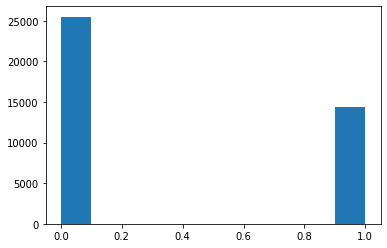

In [ ]:
import catboost
cboost = catboost.CatBoostClassifier(iterations=1000, learning_rate=0.1, class_weights=[0.45, 0.55], depth=14)
cboost.fit(x_train, y1_train, verbose=True)
test_model(cboost, y1_cv)
plt.hist(cboost.predict(x_test))
plt.show()

In [ ]:
r_test = cboost.predict(x_test)
print(r_test.shape)
pd.DataFrame(r_test).to_csv('r.csv')

(39924,)


0:	learn: 0.6571320	total: 912ms	remaining: 15m 10s
1:	learn: 0.6325946	total: 1.79s	remaining: 14m 54s
2:	learn: 0.6181181	total: 2.71s	remaining: 15m
3:	learn: 0.6088537	total: 3.64s	remaining: 15m 7s
4:	learn: 0.6026159	total: 4.56s	remaining: 15m 8s
5:	learn: 0.5974179	total: 5.5s	remaining: 15m 11s
6:	learn: 0.5939034	total: 6.41s	remaining: 15m 9s
7:	learn: 0.5905429	total: 7.31s	remaining: 15m 5s
8:	learn: 0.5879298	total: 8.24s	remaining: 15m 7s
9:	learn: 0.5856549	total: 9.16s	remaining: 15m 6s
10:	learn: 0.5836315	total: 10s	remaining: 15m 2s
11:	learn: 0.5817709	total: 10.9s	remaining: 15m
12:	learn: 0.5801989	total: 11.8s	remaining: 14m 58s
13:	learn: 0.5786511	total: 12.8s	remaining: 14m 58s
14:	learn: 0.5769043	total: 13.7s	remaining: 14m 58s
15:	learn: 0.5754029	total: 14.6s	remaining: 14m 56s
16:	learn: 0.5735933	total: 15.5s	remaining: 14m 57s
17:	learn: 0.5722916	total: 16.5s	remaining: 14m 58s
18:	learn: 0.5707525	total: 17.4s	remaining: 14m 59s
19:	learn: 0.5690836	

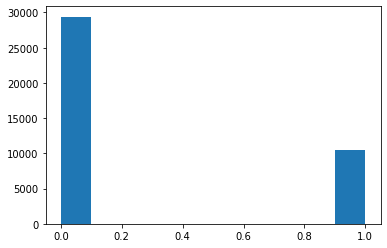

In [ ]:
cboost2 = catboost.CatBoostClassifier(iterations=1000, learning_rate=0.1, class_weights=[0.43, 0.57], depth=14)
cboost2.fit(x_train, y2_train, verbose=True)
test_model(cboost2, y2_cv)
plt.hist(cboost2.predict(x_test))
plt.show()

In [ ]:
g_test = cboost2.predict(x_test)
print(g_test.shape)
pd.DataFrame(g_test).to_csv('g.csv')

(39924,)


0:	learn: 0.6528930	total: 914ms	remaining: 15m 12s
1:	learn: 0.6267226	total: 1.8s	remaining: 15m
2:	learn: 0.6117225	total: 2.67s	remaining: 14m 48s
3:	learn: 0.6039304	total: 3.58s	remaining: 14m 52s
4:	learn: 0.5971387	total: 4.48s	remaining: 14m 52s
5:	learn: 0.5925850	total: 5.39s	remaining: 14m 53s
6:	learn: 0.5888111	total: 6.29s	remaining: 14m 52s
7:	learn: 0.5853401	total: 7.19s	remaining: 14m 52s
8:	learn: 0.5825547	total: 8.09s	remaining: 14m 50s
9:	learn: 0.5798611	total: 8.97s	remaining: 14m 48s
10:	learn: 0.5770831	total: 9.89s	remaining: 14m 49s
11:	learn: 0.5747041	total: 10.8s	remaining: 14m 51s
12:	learn: 0.5730552	total: 11.7s	remaining: 14m 50s
13:	learn: 0.5708230	total: 12.6s	remaining: 14m 50s
14:	learn: 0.5690556	total: 13.6s	remaining: 14m 50s
15:	learn: 0.5675780	total: 14.5s	remaining: 14m 49s
16:	learn: 0.5661869	total: 15.4s	remaining: 14m 48s
17:	learn: 0.5641576	total: 16.3s	remaining: 14m 48s
18:	learn: 0.5626134	total: 17.2s	remaining: 14m 46s
19:	lear

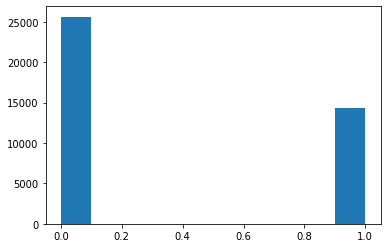

In [ ]:
cboost3 = catboost.CatBoostClassifier(iterations=1000, learning_rate=0.1, class_weights=[0.45, 0.55], depth=14)
cboost3.fit(x_train, y3_train, verbose=True)
test_model(cboost3, y3_cv)
plt.hist(cboost3.predict(x_test))
plt.show()

In [ ]:
b_test = cboost3.predict(x_test)
print(b_test.shape)
pd.DataFrame(b_test).to_csv('b.csv')

(39924,)


In [ ]:
result = pd.DataFrame()
result['target_r'] = r_test
result['target_g'] = g_test
result['target_b'] = b_test
print(result.head())
print(result.shape)
result.to_csv('result.csv', index=False)

   target_r  target_g  target_b
0         0         1         0
1         0         0         1
2         0         0         0
3         0         0         0
4         0         0         0
(39924, 3)
